# Logan T Hernandez

## Research question/interests

**My part of the project will be exploring the change in housing prices, new housing construction, and population of canadian metropolitan areas over time.**

My research question is related to the change in available housing, cost, and population of canadian metropolitan areas. I believe that everyone under 30 is worried about the state of the housing market and availability of affordable living. With this concern in mind, I plan to visualize how the market has changed over time relative to population increases of metropolitan hubs. Since hubs provide the greatest opportunity for career advancement, people who want to earn high paying jobs often relocate to hubs; however, the cost of living in the hub also dictates its affordability, with the highest C.O.L. expenditure being housing. Therefore, my analysis will also attempt to determine the most affordable canadian metropolitan hub respective of housing cost and inventory.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sys 
sys.path.append('..')


sns.set_style("whitegrid")

DailyInterestRate = pd.read_csv("../data/raw/DailyInterestRates/DailyInterestRates.csv")
NewHousingPIndex = pd.read_csv("../data/raw/NewHousingPIndex/NewHousingPIndex.csv")
NewInventory = pd.read_csv("../data/raw/NewInventory/NewInventory.csv", low_memory = False)
PopEstimate = pd.read_csv("../data/raw/PopEstimate/PopEstimate.csv")

In [2]:
from scripts import project_functions2 as pf2

## Part 1, Working with PopEstimate, NewHousingPIndex, and NewInventory DF's

### Data cleaning, processing, wrangling

As seen in my raw analysis pipeline in the ungraded section, I have worked through the Population Estimate dataset and cleaned it by removing erraneous columns and filtered the number of metropolitan areas based on their population increase over the 20 year time span we are working with. I have converted my cleaning and wrangling of this dataset into an individual function that will save and return a sample of the processed dataset.

In [3]:
pf2.PE_ordering_filtering(PopEstimate)

,REF_DATE,GEO,Sex,Age group,UOM,VALUE
47228,2001,"Nanaimo (CA), British Columbia",Females,64 years,Persons,390.0
16506,2001,"Rivière-du-Loup (CA), Quebec",Females,50 to 54 years,Persons,1024.0
860204,2017,"Port Hope (CA), Ontario",Males,2 years,Persons,64.0
1035936,2020,"Chilliwack (CA), British Columbia",Females,12 years,Persons,703.0


Next, I will use another method chain to further wrangle the data into another workable dataset that will rename all row entries with improper formatting, drop the metropolitan areas not subjected to our analysis, and convert to date time. This  will be saved in a dataframe called PE_Wrangled_Final. 

In [4]:
PE_ordered_filtered_v2 = pd.read_csv("../data/processed/PE_ordered_filtered_v2.csv")
PE_Wrangled = PE_ordered_filtered_v2

In [5]:
pf2.PE_Wrangled(PE_Wrangled)

,REF_DATE,GEO,Sex,Age group,UOM,VALUE
168173,2021-01-01,"Toronto, Ontario",Males,35 to 39 years,Persons,242244.0
74628,2010-01-01,"St. John's, Newfoundland and Labrador",Both sexes,89 years,Persons,294.0
15299,2002-01-01,"Kelowna, British Columbia",Males,2 years,Persons,766.0
158498,2020-01-01,"Sherbrooke, Quebec",Males,22 years,Persons,1528.0


This next function will filter the age group category to show all ages, and sex to only show both sexes, then saves that version to a separate .csv named PE_Wrangled_Final_all_ages.

In [6]:
PE_Wrangled_Final = pd.read_csv("../data/processed/PE_Wrangled_Final.csv")

In [7]:
pf2.all_ages_both_sexes(PE_Wrangled_Final)

,REF_DATE,GEO,Sex,Age group,UOM,VALUE
37,2002-01-01,"Windsor, Ontario",Both sexes,All ages,Persons,326732.0
226,2010-01-01,"Kitchener-Cambridge-Waterloo, Ontario",Both sexes,All ages,Persons,506907.0
77,2004-01-01,"Montréal, Quebec",Both sexes,All ages,Persons,3725738.0
381,2016-01-01,"Vancouver, British Columbia",Both sexes,All ages,Persons,2582202.0


Now, I will use another set of functions to import the newly created datasets, calculate the total rate of change for their respective values, save the dataframe to a new .csv, and then display the file. 

In [8]:
PE_Wrangled_Final_all_ages = pd.read_csv("../data/processed/PE_Wrangled_Final_all_ages.csv")

In [9]:
pf2.calculate_total_rate_change_PE(PE_Wrangled_Final_all_ages)

,GEO,PE_rate_total
1,"Windsor, Ontario",12.064808
22,"Edmonton, Alberta",57.599206
17,"Vancouver, British Columbia",37.027564
3,"Nelson (CA), British Columbia",15.816560


In [10]:
pf2.NHPI_ordering_filtering(NewHousingPIndex)

,REF_DATE,GEO,New housing price indexes,UOM,VALUE
0,2001-01-01,"St. John's, Newfoundland and Labrador",Total (house and land),"Index, 201612=100",49.5
1,2001-01-01,"Halifax, Nova Scotia",Total (house and land),"Index, 201612=100",66.3
2,2001-01-01,"Québec, Quebec",Total (house and land),"Index, 201612=100",58.6
3,2001-01-01,"Sherbrooke, Quebec",Total (house and land),"Index, 201612=100",NaN


In [11]:
NHPI_W_Final = pd.read_csv("../data/processed/NHPI_W_Final.csv")

In [12]:
pf2.calculate_total_rate_change_NHPI(NHPI_W_Final)

,GEO,NHPI_rate_total
5,"Greater Sudbury, Ontario",49.691739
13,"St. John's, Newfoundland and Labrador",113.333333
8,"Vancouver, British Columbia",76.341128
7,"Windsor, Ontario",59.267241


In [13]:
pf2.NI_ordering_filtering(NewInventory)

,REF_DATE,GEO,Housing estimates,Type of unit,UOM,VALUE
0,2001-01-01,"Calgary, Alberta",Housing completions,Total units,Units,1197
1,2001-01-01,"Edmonton, Alberta",Housing completions,Total units,Units,451
2,2001-01-01,"Greater Sudbury, Ontario",Housing completions,Total units,Units,11
3,2001-01-01,"Guelph, Ontario",Housing completions,Total units,Units,73


In [14]:
NI_Wrangled_Final = pd.read_csv("../data/processed/NI_Wrangled_Final.csv")

In [15]:
pf2.calculate_total_rate_change_NI(NI_Wrangled_Final)

,GEO,NI_rate_total
3,"St. John's, Newfoundland and Labrador",-16.060837
21,"Vancouver, British Columbia",920.486692
16,"Victoria, British Columbia",220.836502
0,"Toronto, Ontario",-334.266160


### Data cleaning, processing, wrangling – Final steps
At this point, I only have 1 more step of my analysis after I import the respective total rate change dataframes from their .csv files, and use another function that merges the three datasets together to a single .csv. This function then saves the merged dataset, and displays the new file. 

In [16]:
total_rate_change_PE = pd.read_csv("../data/processed/total_rate_change_PE.csv")
total_rate_change_PE = total_rate_change_PE.drop(columns=['Unnamed: 0'])
total_rate_change_NHPI = pd.read_csv("../data/processed/total_rate_change_NHPI.csv")
total_rate_change_NHPI = total_rate_change_NHPI.drop(columns=['Unnamed: 0'])
total_rate_change_NI = pd.read_csv("../data/processed/total_rate_change_NI.csv")
total_rate_change_NI = total_rate_change_NI.drop(columns=['Unnamed: 0'])

In [17]:
pf2.merging_rate_totals(total_rate_change_PE, total_rate_change_NHPI, total_rate_change_NI)

,GEO,PE_rate_total,NHPI_rate_total,NI_rate_total
15,"Toronto, Ontario",36.926972,107.168459,-334.266160
21,"Edmonton, Alberta",57.599206,116.831683,767.908745
0,"Greater Sudbury, Ontario",6.788259,49.691739,1.003802
3,"Trois-Rivières, Quebec",16.979342,11.000000,72.273764


### Final step, aggregated scoring

In [18]:
merged_rate_totals = pd.read_csv("../data/processed/merged_rate_totals.csv")
merged_rate_totals = merged_rate_totals.drop(columns=['Unnamed: 0'])

In [19]:
pf2.score_em(merged_rate_totals)

,GEO,PE_rate_total,NHPI_rate_total,NI_rate_total,aggregated_score
22,"Montréal, Quebec",20.737784,155.387205,2948.167300,646.618514
21,"Vancouver, British Columbia",37.027564,76.341128,920.486692,225.513459
11,"Victoria, British Columbia",29.903111,50.060024,220.836502,74.136863
6,"St. John's, Newfoundland and Labrador",24.169254,113.333333,-16.060837,42.872460


Great! I am left with a single merged rate dataset with aggregated scores among many other datasets from various stages of my cleaning/wrangling pipeline that can be used for visualizations.

## Part 2, Visualizations
### Visualizations related to PopEstimate

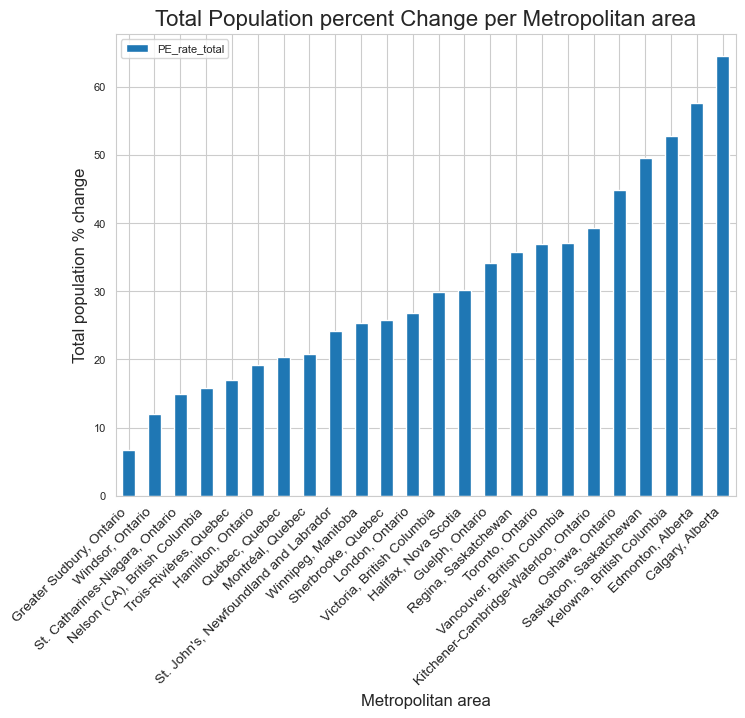

In [20]:
total_rate_change_PE.plot(x="GEO", y="PE_rate_total", kind="bar", figsize=(8, 6))
plt.title("Total Population percent Change per Metropolitan area", fontsize=16)
plt.xlabel("Metropolitan area", fontsize=12)
plt.ylabel("Total population % change", fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=8)
plt.legend(fontsize=8)
plt.savefig("../images/total_rate_change_PE_graph.png", dpi=300, bbox_inches='tight')
plt.show()

Wow! After all this I have finally answered part of my research question! The fastest growing metropolitan area in Canada is Calgary, AB with Edmonton, AB and Kelowna, BC coming in 2nd and 3rd. In the future, I will conduct this same analysis using the wrangled NewHousingPriceIndex and to derive a definitive answer to which metropolitan hub is the most affordable respective to housing cost and inventory. It will be interesting to see if the top three hubs with respect to population growth will also be at the top with respect to cost.

### Visualizations related to New Housing Price Index

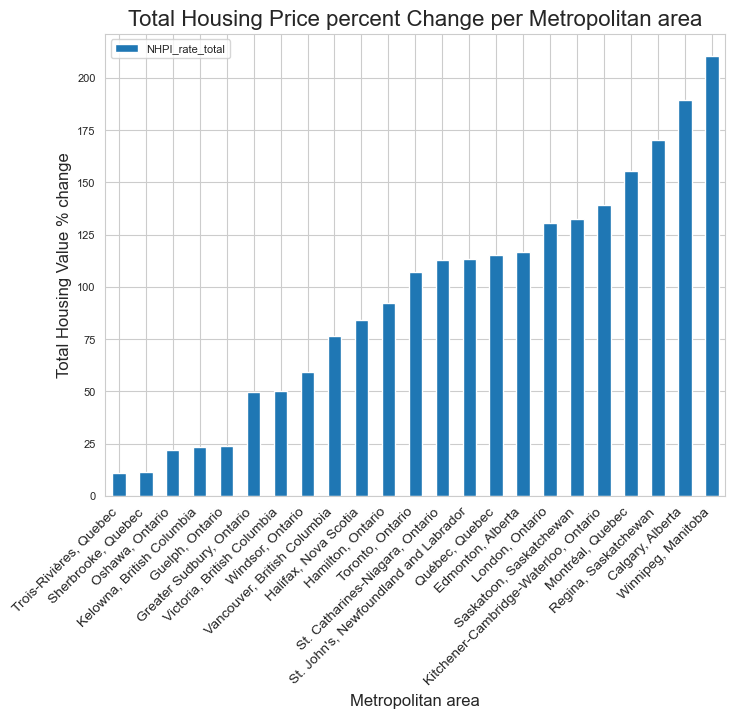

In [21]:
total_rate_change_NHPI.plot(x="GEO", y="NHPI_rate_total", kind="bar", figsize=(8, 6))
plt.title("Total Housing Price percent Change per Metropolitan area", fontsize=16)
plt.xlabel("Metropolitan area", fontsize=12)
plt.ylabel("Total Housing Value % change", fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=8)
plt.legend(fontsize=8)
plt.savefig("../images/total_rate_change_NHPI_graph.png", dpi=300, bbox_inches='tight')
plt.show()

I have finally answered the second part of my research question! From the bar chart, I can see that Winnipeg has had the largest increase in housing price over 20 years, with Calgary and Regina coming in 2nd and 3rd place. Interestingly, Calgary had the largest change in population and also a large change in price. Kelowna, which was 3rd in population increase is 20th in housing price increase. I believe this may be due to Kelowna being a lake city, which would have kept the price high even 20 years ago as it is desirable.

### Visualizations related to Housing Inventory Index

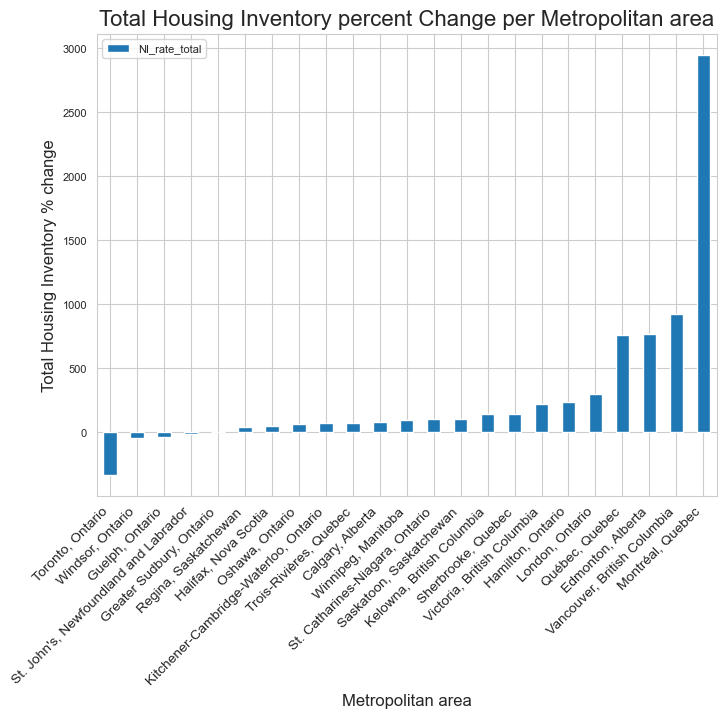

In [22]:
total_rate_change_NI.plot(x="GEO", y="NI_rate_total", kind="bar", figsize=(8, 6))
plt.title("Total Housing Inventory percent Change per Metropolitan area", fontsize=16)
plt.xlabel("Metropolitan area", fontsize=12)
plt.ylabel("Total Housing Inventory % change", fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=8)
plt.legend(fontsize=8)
plt.savefig("../images/total_rate_change_NI_graph.png", dpi=300, bbox_inches='tight')
plt.show()

I have finally answered the third part of my research question! From the bar chart, I can infer that Montreal has has the highest inventory percent change of all metropolitan areas. Second is Vancouver, which makes sense since it always has construction going on and new multi-family living (i.e., Apartments, townhomes, duplexes, etc.) constructed yearly. Edmonton makes sense for the same reason, and also has more open land for building.  

### Visualization related to scored_metros DF

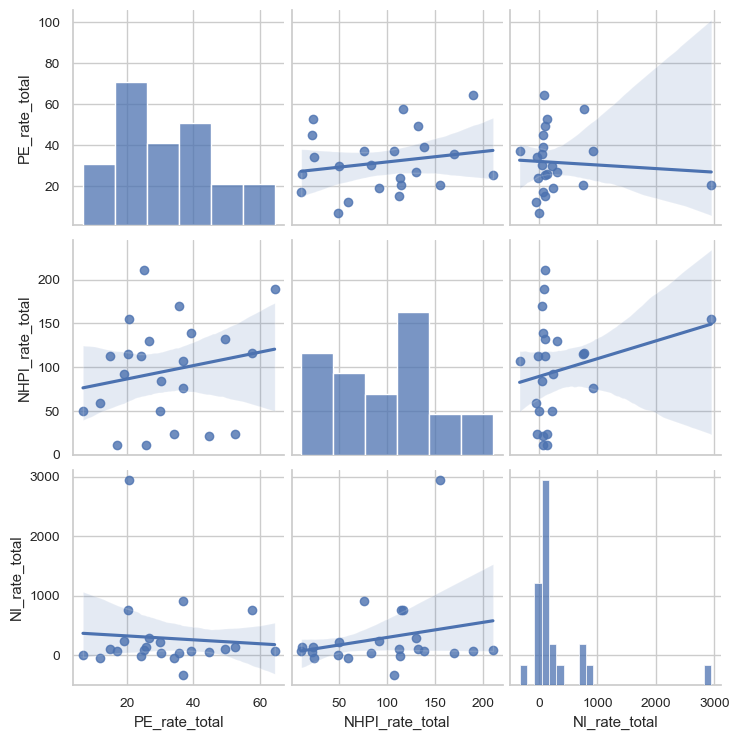

In [23]:
sns.set(font_scale=0.9)
sns.set_style("whitegrid")
scored_metros = pd.read_csv("../data/processed/scored_metros.csv")
columns = ['PE_rate_total', 'NHPI_rate_total', 'NI_rate_total']
g = sns.pairplot(scored_metros[columns], kind='reg')
plt.savefig("../images/pairplot_of_all_rates_graph.png", dpi=300, bbox_inches='tight')
plt.show()


This offers a good visual for showing the correlation between the total population rate of change, housing price change, and housing inventory change. From the pairplot, one can infer that the correlation between new inventory is positively correlated to increasing housing costs, but slightly negatively correlated to increase population estimates, however the strength of correlation is low as indicated by the wide forecast of the blue shaded regions. As for increasing housing price, it is slightly positively correlated with increased population, but as before the correlation is weak and dependent on the metropolitan area. As for increasing population sizes, its slightly negatively correlated with new inventory and slightly positively correlated with increased housing price. All of this is explainable as supply and demand, as more people need residence, the cost of residence increases, therefore the need for new inventory increases but the availability will be bottlenecked by construction time and cost of construction, which in turn is limited by the rising housing cost, thus decreasing availability. 

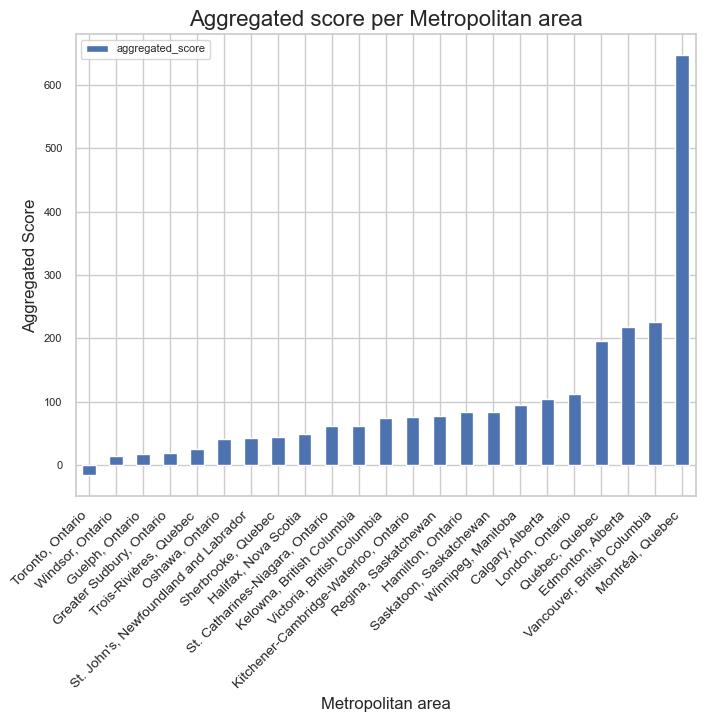

In [24]:
scored_metros.plot(x="GEO", y="aggregated_score", kind="bar", figsize=(8, 6))
plt.title("Aggregated score per Metropolitan area", fontsize=16)
plt.xlabel("Metropolitan area", fontsize=12)
plt.ylabel("Aggregated Score", fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=8)
plt.legend(fontsize=8)
plt.savefig("../images/aggregated_score_graph.png", dpi=300, bbox_inches='tight')
plt.show()

## Conclusion - Top CMA's are Montreal, Vancouver, Edmonton...
Finally, my analysis is complete. From the graph it can be seen that Montreal has the highest score of all other metropolitan areas by a significant margin. This is mainly due to its remarkable housing inventory and price percent change. Coming in second is Vancouver, then Edmonton. Wrapping up the top 5 metropolitan areas are Quebec and London. On the other end of things, Toronto has a negative score, due to its decrease in housing inventory percent change, meaning that there are not enough houses reaching the market to keep up with demand. The same can be said for the bottom 5 included in our analysis.